# Which parameters tend to have an effect on the renting duration of FordGoBikes?
## by Moritz Stabel

## Investigation Overview

In this investigation i want to have a look at the renting duration of FordGoBikes and the influence of different parameters on it. 

## Dataset Overview

The dataset contains 453159 entries for bike bookings in the year 2017, starting in June, since this is earliest entry in the dataset. The attributes contrain the renting duration, information about the user like birth year, gender and if the user is a subscriber or not, the datetime of the rental beginning and ending and the coordinates of the start and end station. 66,462 entries where removed from the dataset du to inconsistencies or missing information. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
ford_bikes_clean=pd.read_csv('ford_bikes_clean.csv')


## Distribution of the Renting Duration

The renting duration in the dataset ranges from about 1 minute at the lowes, to about 1400 minutes. Since the amount of Rentings with such a high duration is really low, the visualisation only displays the range of 0-100 minutes. As you can see, the distribution is normaly distributed with on peak arround 11 minutes. 

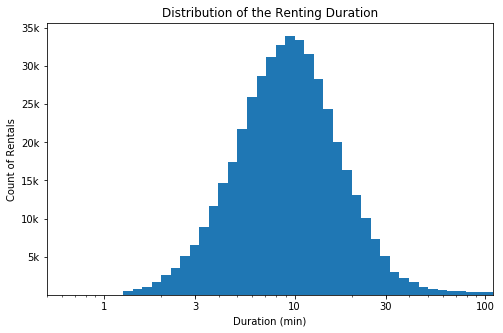

In [5]:
plt.figure(figsize=[8, 5])
bin_edges = 10** np.arange(0.1, np.log10(ford_bikes_clean['duration_min'].max())+0.05,0.05)
plt.hist(data = ford_bikes_clean, x = 'duration_min',bins=bin_edges);
plt.xscale('log')
tick_locs = [1,3,10, 30, 100]
y_lable=['5k','10k','15k','20k','25k','30k','35k']
y_ticks=np.arange(5000,40000,5000)
plt.title('Distribution of the Renting Duration')
plt.xticks(tick_locs, tick_locs);
plt.yticks(y_ticks,y_lable)
plt.xlim(0.5,110)
plt.xlabel('Duration (min)');
plt.ylabel('Count of Rentals');

## Renting Duration by Month and Day

In this Visualisation you can see the that the average rental duration increases slightly over the summer month, and decreases towards the winter months. If you look at the rental duration over the weekday on the right, it becomes clear that the average renting duration on the weekend increases compared to the average rental duration under the week.

In [12]:
def plotboxplot():
    fig, ax=  plt.subplots(ncols = 2, figsize = [10,6]);
    flierprops = dict(markerfacecolor='0.75', markersize=5,linestyle='none');
    plt.figure(figsize=[8, 5]);
    base_color=sb.color_palette()[0];
    sb.boxplot(data = ford_bikes_clean, x = 'month_start', y = 'duration_min', color = base_color,flierprops=flierprops,ax=ax[0]);
    tick_locs = [1,3,10,30,100];
    xticks=np.arange(0,7,1);
    xlable=['Jun','Jul','Aug','Sep','Okt','Nov','Dec'];
    ax[0].set_yscale('log');
    ax[0].set_ylim(0.5,110);
    ax[0].set_yticks(tick_locs);
    ax[0].set_yticks(tick_locs);
    ax[0].set_yticklabels(tick_locs);
    ax[0].set_xticks(xticks);
    ax[0].set_xticklabels(xlable);
    ax[0].set_ylabel(" Renting Duration (min)");
    ax[0].set_xlabel(" Month of Rental (-)");

    sb.boxplot(data = ford_bikes_clean, x = 'day_start', y = 'duration_min', color = base_color,flierprops=flierprops,ax=ax[1]);
    xlable=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'];
    ax[1].set_yscale('log');
    ax[1].set_ylim(0.5,110);
    ax[1].set_yticks(tick_locs);
    ax[1].set_yticks(tick_locs);
    ax[1].set_yticklabels(tick_locs);
    ax[1].set_xticks(xticks);
    ax[1].set_xticklabels(xlable);
    ax[1].set_ylabel("");
    ax[1].set_xlabel(" Day of Rental (-)");
    fig.suptitle('Renting Duration by Month and Weekday');
    plt.show;

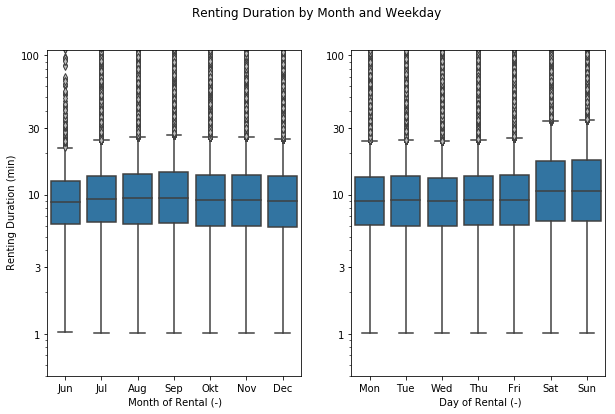

<Figure size 576x360 with 0 Axes>

In [16]:
plotboxplot();

## Renting Duration over the Weekdays of each Month

If You look at the average rental duration over months and weekdays, you can see that the renting duration under the week and on the weekends decreases towards the winter. In july the average renting duration on the weekend ist 26 minutes on saturday and 25 minutes on sunday. In December it is only 15 minutes on saturday and 16 minutes on sunday.In July the highest average rental duration under the week is on tuesday with 16 minutes. The highest average rental duration under the week in December is 13 minutes on Friday.

In [7]:
def plot_heatmap():
    plt.figure(figsize=[10, 6])
    cat_means = ford_bikes_clean.groupby(['month_start', 'day_start']).mean()['duration_min']
    cat_means = cat_means.reset_index(name = 'duration_min_avg')
    cat_means = cat_means.pivot(index = 'month_start', columns = 'day_start',
                                values = 'duration_min_avg')
    ax = sb.heatmap(cat_means, annot = True,fmt = '.0f',
               cbar_kws = {'label' : 'mean rental duration (min)'},cmap = 'vlag')
    yticks=np.arange(0.5,7.5,1)
    ylable=['Jun','Jul','Aug','Sep','Okt','Nov','Dec']
    xticks=np.arange(0.5,7.5,1)
    xlable=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylable)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlable);
    ax.set_ylabel(" Month of Rental (-)")
    ax.set_xlabel(" Day of Rental (-)")
    ax.set_title('Renting Duration by Weekday over Month')
    plt.show()
    

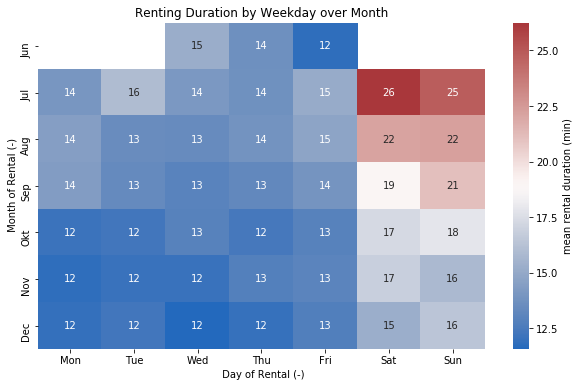

In [8]:
plot_heatmap();